In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('here.csv')

# Combine title and description into a single text feature
df['text'] = df['title'] + ' ' + df['description'].fillna('')

# Split features and target
X = df['text']
y = df['distracting']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Training set size: 764
Testing set size: 192


In [3]:
# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, 
                             stop_words='english',
                             ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(n_estimators=100, 
                                  random_state=42))
])

# Train 
pipeline.fit(X_train, y_train)

# predicton
y_pred = pipeline.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        61
           1       0.89      0.92      0.90       131

    accuracy                           0.86       192
   macro avg       0.85      0.84      0.84       192
weighted avg       0.86      0.86      0.86       192



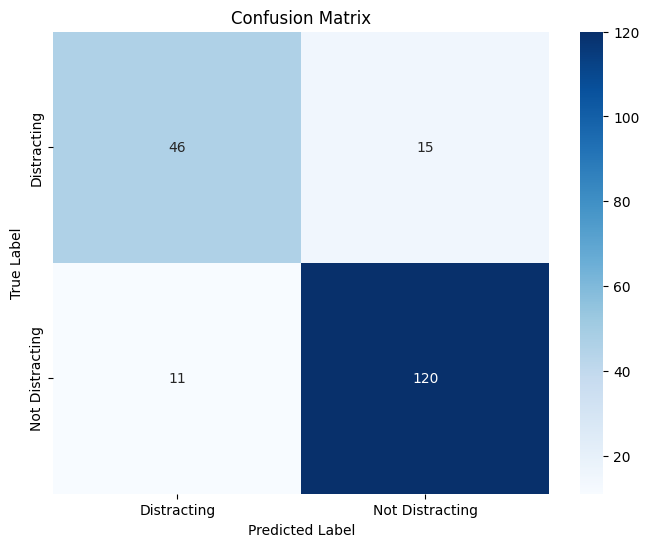

In [4]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

# confusion mat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Distracting', 'Not Distracting'],
            yticklabels=['Distracting', 'Not Distracting'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

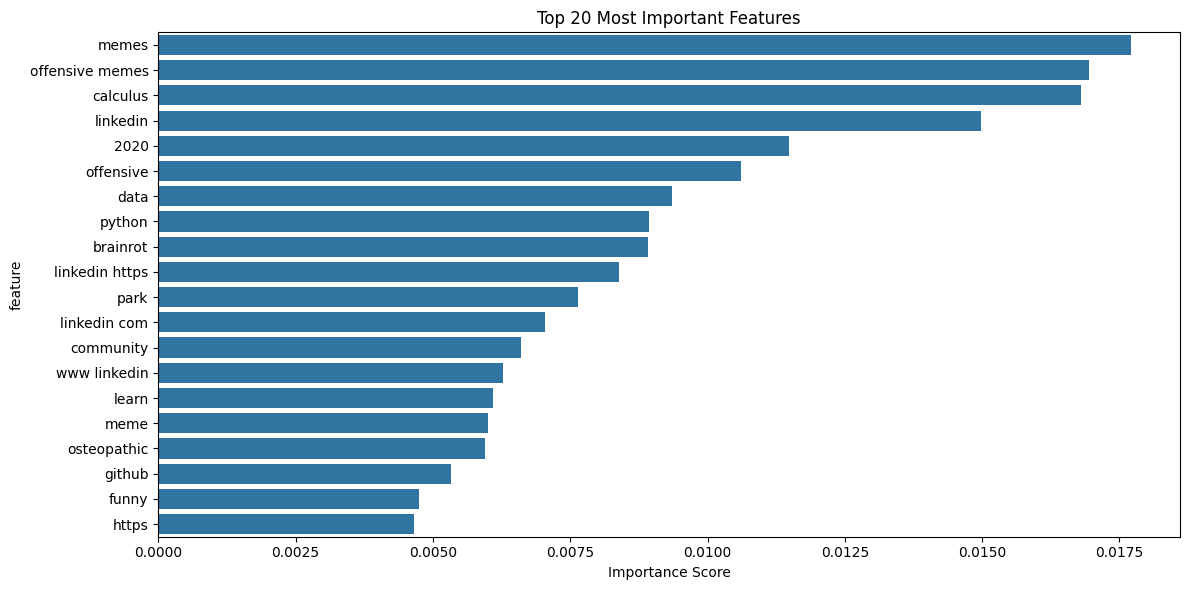

In [5]:
# Get feature names and their importance scores
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
importances = pipeline.named_steps['clf'].feature_importances_

# Create DataFrame of features and their importance scores
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance and display top 20 features
top_features = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [6]:
import joblib
joblib.dump(pipeline, 'model.pkl')

['model.pkl']

In [16]:
def predict_distraction(title, description):
    """Function to predict if a video is distracting based on its title and description"""
    text = title + ' ' + (description or '')
    prediction = pipeline.predict([text])[0]
    probability = pipeline.predict_proba([text])[0]
    
    print(f'Title: {title}')
    print(f'Prediction: {"Not Distracting" if prediction == 1 else "Distracting"}')
    print(f'Confidence: {max(probability):.2%}')
    
    print("here",prediction)
    return int(prediction)

# Example usage
predict_distraction(
    "10 minutes of brainrot memes",
    """Enjoy 10 Minutes Of Brainrot V4! memes, meme, memes compilation, dank memes, offensive memes, funny, funny memes, funny ..."""
)

# predict_distraction(
#     "Calculus: Differentiating Trig Functions - Quotient & Product Rules NCERT CBSE",
#     """Sharpen your calculus skills by learning to differentiate trigonometric functions using the quotient and product rules! This video ..."""
# )

Title: 10 minutes of brainrot memes
Prediction: Distracting
Confidence: 100.00%
here 0


0